A data pipeline is a series of processes that involves the collection, transformation, and storage of data to make it accessible and useful for analysis. The structure of a data pipeline can vary depending on the specific requirements of a project, but here is a general breakdown of its components:


1. **Data Ingestion:**
   - **Description:** This is the initial step where raw data is brought into the pipeline. Data can come from various sources such as databases, APIs, logs, or external systems.
   - **Processes:**
     - Collecting and fetching data from source systems.
     - Handling real-time or batch data ingestion.

In [1]:
import pandas as pd

def batch_data_ingestion(file_path):
    """
    Batch data ingestion from a CSV file.
    
    Parameters:
    - file_path (str): Path to the CSV file.
    
    Returns:
    - DataFrame: The ingested data in a Pandas DataFrame.
    """
    try:
        # Read the CSV file into a Pandas DataFrame
        data = pd.read_csv(file_path)
        
        # Perform any additional pre-processing if needed
        
        return data
    except Exception as e:
        print(f"Error during data ingestion: {e}")
        return None

# Example Usage
csv_file_path = "path/to/your/data.csv"
ingested_data = batch_data_ingestion(csv_file_path)

if ingested_data is not None:
    print("Data Ingested Successfully:")
    print(ingested_data.head())
else:
    print("Data Ingestion Failed.")


Error during data ingestion: [Errno 2] No such file or directory: 'path/to/your/data.csv'
Data Ingestion Failed.


2. **Data Storage:**
   - **Description:** Once data is ingested, it needs to be stored in a structured manner for further processing. The storage choice depends on factors like data volume, type, and access patterns.
   - **Processes:**
     - Storing data in databases, data lakes, or warehouses.
     - Ensuring data integrity and security.


In [ ]:
from sqlalchemy import create_engine, Column, Integer, String, DateTime, ForeignKey
from sqlalchemy.ext.declarative import declarative_base
from sqlalchemy.orm import relationship, Session
from datetime import datetime

# Define the SQLAlchemy database engine
engine = create_engine('sqlite:///example_database.db', echo=True)

# Define the SQLAlchemy declarative base
Base = declarative_base()

# Define a sample data model (you can customize this based on your data)
class User(Base):
    __tablename__ = 'users'

    id = Column(Integer, primary_key=True)
    username = Column(String, unique=True)
    email = Column(String, unique=True)
    created_at = Column(DateTime, default=datetime.utcnow)

class DataEntry(Base):
    __tablename__ = 'data_entries'

    id = Column(Integer, primary_key=True)
    value = Column(Integer)
    user_id = Column(Integer, ForeignKey('users.id'))
    user = relationship('User', back_populates='data_entries')

# Create the tables in the database
Base.metadata.create_all(engine)

# Create a new user and associated data entry
new_user = User(username='john_doe', email='john@example.com')
data_entry = DataEntry(value=42, user=new_user)

# Add the user and data entry to the database
with Session(engine) as session:
    session.add(new_user)
    session.commit()

# Query the database to retrieve the stored data
with Session(engine) as session:
    user_query = session.query(User).filter_by(username='john_doe').first()
    print(f"User: {user_query.username}, Email: {user_query.email}")

    data_entries_query = session.query(DataEntry).filter_by(user=user_query).all()
    for entry in data_entries_query:
        print(f"Data Entry ID: {entry.id}, Value: {entry.value}")


3. **Data Processing:**
   - **Description:** Raw data often needs to be transformed, cleaned, or enriched before analysis. This step involves processing data to make it suitable for downstream tasks.
   - **Processes:**
     - Transforming data formats and structures.
     - Cleaning and handling missing values.
     - Enriching data with additional information.

In [2]:
import pandas as pd

# Sample raw data
raw_data = {
    'Name': ['Alice', 'Bob', 'Charlie', 'David', 'Eva'],
    'Age': [25, None, 30, 22, 28],
    'Salary': [50000, 60000, 75000, None, 80000],
    'Department': ['HR', 'IT', 'Finance', 'IT', 'Marketing']
}

# Creating a DataFrame
df = pd.DataFrame(raw_data)

# Displaying the raw data
print("Raw Data:")
print(df)
print("\n")

# Data Processing Steps

# 1. Handling Missing Values
df['Age'].fillna(df['Age'].mean(), inplace=True)
df['Salary'].fillna(df['Salary'].median(), inplace=True)

# 2. Transforming Data Formats and Structures
df['Salary'] = df['Salary'].astype(int)

# 3. Enriching Data with Additional Information
df['Seniority'] = df['Age'].apply(lambda age: 'Senior' if age >= 30 else 'Junior')

# Displaying the processed data
print("Processed Data:")
print(df)


Raw Data:
      Name   Age   Salary Department
0    Alice  25.0  50000.0         HR
1      Bob   NaN  60000.0         IT
2  Charlie  30.0  75000.0    Finance
3    David  22.0      NaN         IT
4      Eva  28.0  80000.0  Marketing


Processed Data:
      Name    Age  Salary Department Seniority
0    Alice  25.00   50000         HR    Junior
1      Bob  26.25   60000         IT    Junior
2  Charlie  30.00   75000    Finance    Senior
3    David  22.00   67500         IT    Junior
4      Eva  28.00   80000  Marketing    Junior


4. **Data Transformation:**
   - **Description:** This step involves preparing the data for analysis or consumption by downstream applications. It can include aggregations, joins, and other operations.
   - **Processes:**
     - Applying business rules to the data.
     - Aggregating data for reporting.
     - Encoding and normalization.

In [3]:
import pandas as pd

# Sample dataset
data = {
    'Name': ['Alice', 'Bob', 'Charlie', 'David', 'Emma'],
    'Age': [25, 30, 22, 35, 28],
    'Salary': [50000, 60000, 45000, 70000, 55000],
    'Department': ['HR', 'IT', 'Finance', 'IT', 'Marketing']
}

df = pd.DataFrame(data)

# Applying business rules (e.g., giving a bonus to employees in the IT department)
df['Salary'] = df.apply(lambda row: row['Salary'] + 5000 if row['Department'] == 'IT' else row['Salary'], axis=1)

# Aggregating data for reporting (e.g., average age and total salary per department)
report_df = df.groupby('Department').agg({'Age': 'mean', 'Salary': 'sum'}).reset_index()

# Encoding and normalization (e.g., converting department names to numerical labels and normalizing age)
department_encoding = {'HR': 1, 'IT': 2, 'Finance': 3, 'Marketing': 4}
df['Department_Encoded'] = df['Department'].map(department_encoding)

# Normalizing Age using Min-Max scaling
df['Age_Normalized'] = (df['Age'] - df['Age'].min()) / (df['Age'].max() - df['Age'].min())

# Displaying the transformed data
print("Original Data:")
print(df)
print("\nAggregated Report:")
print(report_df)


Original Data:
      Name  Age  Salary Department  Department_Encoded  Age_Normalized
0    Alice   25   50000         HR                   1        0.230769
1      Bob   30   65000         IT                   2        0.615385
2  Charlie   22   45000    Finance                   3        0.000000
3    David   35   75000         IT                   2        1.000000
4     Emma   28   55000  Marketing                   4        0.461538

Aggregated Report:
  Department   Age  Salary
0    Finance  22.0   45000
1         HR  25.0   50000
2         IT  32.5  140000
3  Marketing  28.0   55000


5. **Data Analysis:**
   - **Description:** Analyzing the transformed data to derive insights, patterns, and trends. This step often involves the use of statistical methods, machine learning, or other analytics techniques.
   - **Processes:**
     - Running statistical analyses.
     - Building machine learning models.
     - Extracting actionable insights.

In [ ]:
# Import necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Load your transformed dataset (replace 'your_dataset.csv' with your actual dataset file)
df = pd.read_csv('your_dataset.csv')

# Display basic statistics of the dataset
print("Basic Statistics:")
print(df.describe())

# Correlation Matrix
correlation_matrix = df.corr()
print("\nCorrelation Matrix:")
print(correlation_matrix)

# Split the data into features (X) and target variable (y)
X = df.drop('target_column', axis=1)  # Replace 'target_column' with your actual target variable
y = df['target_column']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Build a simple machine learning model (Random Forest Classifier in this case)
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model accuracy
accuracy = accuracy_score(y_test, y_pred)
print("\nModel Accuracy:", accuracy)

# Extract actionable insights
# - Feature importance in the trained model
feature_importance = model.feature_importances_
print("\nFeature Importance:")
print(dict(zip(X.columns, feature_importance)))

# You can further analyze and interpret the results based on your specific dataset and goals.


6. **Data Visualization:**
   - **Description:** Communicating the results of data analysis in a visual format. Visualization makes complex patterns more accessible and aids in decision-making.
   - **Processes:**
     - Creating charts, graphs, and dashboards.
     - Designing reports for stakeholders.

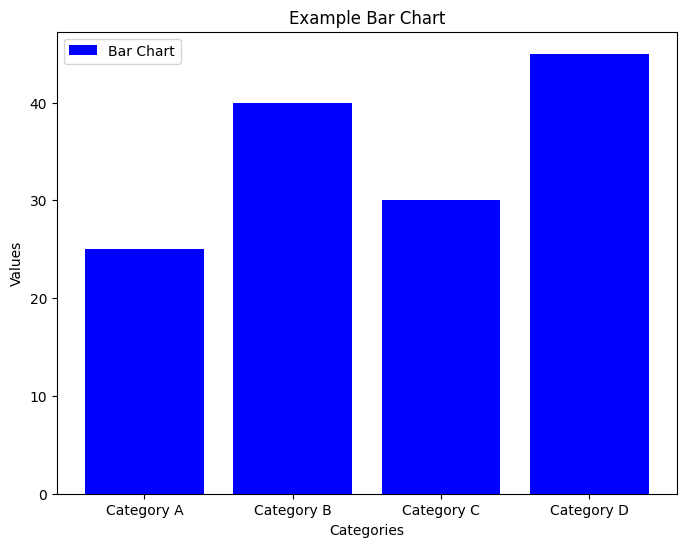

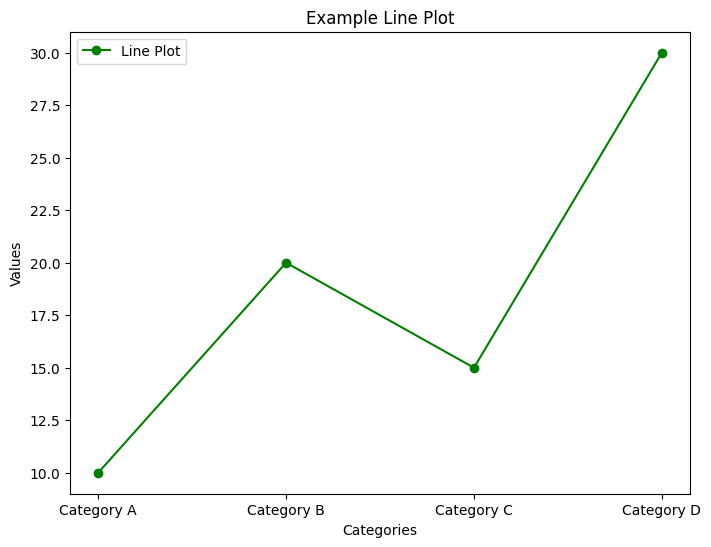

In [4]:
import matplotlib.pyplot as plt

# Sample data for visualization
categories = ['Category A', 'Category B', 'Category C', 'Category D']
values_bar_chart = [25, 40, 30, 45]
values_line_plot = [10, 20, 15, 30]

# Creating a bar chart
plt.figure(figsize=(8, 6))
plt.bar(categories, values_bar_chart, color='blue', label='Bar Chart')
plt.xlabel('Categories')
plt.ylabel('Values')
plt.title('Example Bar Chart')
plt.legend()
plt.show()

# Creating a line plot
plt.figure(figsize=(8, 6))
plt.plot(categories, values_line_plot, marker='o', color='green', label='Line Plot')
plt.xlabel('Categories')
plt.ylabel('Values')
plt.title('Example Line Plot')
plt.legend()
plt.show()


7. **Data Storage (Again):**
   - **Description:** The analyzed and processed data may need to be stored for future reference, auditing, or as a source for subsequent analyses.
   - **Processes:**
     - Archiving or versioning data.
     - Ensuring data consistency and availability.

In [ ]:
import shutil
import os
import datetime

def archive_data(source_directory, destination_directory):
    """
    Archive data from the source directory to the destination directory with timestamp.
    
    Parameters:
    - source_directory (str): Path to the source directory containing processed data.
    - destination_directory (str): Path to the destination directory for storing the archive.
    """
    # Create a timestamp to include in the archive filename
    timestamp = datetime.datetime.now().strftime("%Y%m%d%H%M%S")
    
    # Create the destination directory if it doesn't exist
    os.makedirs(destination_directory, exist_ok=True)
    
    # Compress the source directory and create an archive with timestamp
    archive_filename = f"data_archive_{timestamp}.zip"
    archive_path = os.path.join(destination_directory, archive_filename)
    
    shutil.make_archive(archive_path, 'zip', source_directory)
    
    print(f"Data archived successfully: {archive_path}")

# Example usage:
source_directory = '/path/to/processed_data'
destination_directory = '/path/to/archive'
archive_data(source_directory, destination_directory)


8. **Data Delivery:**
   - **Description:** Making the results of data analysis and visualization available to end-users, stakeholders, or downstream systems.
   - **Processes:**
     - Deploying reports and dashboards.
     - Integrating with other systems.

In [5]:
# Import necessary libraries
import dash
from dash import dcc, html
import pandas as pd
import plotly.express as px

# Sample Data (replace this with your actual data)
df = pd.DataFrame({
    'Date': pd.date_range(start='2022-01-01', periods=10, freq='D'),
    'Sales': [100, 120, 130, 110, 90, 150, 170, 160, 140, 180],
    'Profit': [20, 25, 30, 15, 10, 35, 40, 38, 28, 45]
})

# Initialize Dash app
app = dash.Dash(__name__)

# Define the layout of the dashboard
app.layout = html.Div(children=[
    html.H1(children='Sales and Profit Dashboard'),

    # Line chart
    dcc.Graph(
        id='line-chart',
        figure=px.line(df, x='Date', y=['Sales', 'Profit'], title='Sales and Profit Over Time')
    ),

    # Bar chart
    dcc.Graph(
        id='bar-chart',
        figure=px.bar(df, x='Date', y='Sales', title='Daily Sales')
    )
])

# Run the app
if __name__ == '__main__':
    app.run_server(debug=True)


ModuleNotFoundError: No module named 'dash'

9. **Monitoring and Maintenance:**
   - **Description:** Continuous monitoring of the data pipeline to ensure its health and performance. This includes identifying and addressing issues as they arise.
   - **Processes:**
     - Setting up alerts for anomalies.
     - Regularly updating and maintaining the pipeline components.

In [ ]:
import logging
import time
import random

# Dummy function simulating data processing
def process_data(data):
    # Simulate some data processing
    result = data * random.uniform(0.8, 1.2)
    return result

# Dummy function simulating data pipeline
def data_pipeline():
    while True:
        try:
            # Get data from source
            raw_data = get_data_from_source()

            # Process data
            processed_data = process_data(raw_data)

            # Store data or perform further actions
            store_data(processed_data)

            # Sleep for a fixed interval
            time.sleep(60)  # Sleep for 1 minute

        except Exception as e:
            # Log exceptions and send alerts
            logging.error(f"Error in data pipeline: {str(e)}")
            send_alert(f"Error in data pipeline: {str(e)}")

# Dummy function simulating fetching data from a source
def get_data_from_source():
    # Simulate fetching data from a source
    return random.randint(1, 100)

# Dummy function simulating storing data
def store_data(data):
    # Simulate storing data
    logging.info(f"Data stored: {data}")

# Dummy function simulating sending alerts
def send_alert(message):
    # Simulate sending alerts
    logging.warning(f"ALERT: {message}")

if __name__ == "__main__":
    # Configure logging to write to a file
    logging.basicConfig(filename="data_pipeline.log", level=logging.DEBUG)

    # Run the data pipeline
    data_pipeline()


10. **Metadata Management:**
   - **Description:** Maintaining metadata about the data, such as its source, transformations, and usage. This is crucial for understanding the lineage and quality of data.
   - **Processes:**
     - Documenting metadata for each dataset.
     - Creating a data catalog for easy reference.

In [ ]:
class MetadataManager:
    def __init__(self):
        # Initialize an empty metadata dictionary
        self.metadata = {}

    def add_dataset_metadata(self, dataset_name, source, description):
        # Add metadata for a new dataset
        self.metadata[dataset_name] = {
            'source': source,
            'description': description,
            'transformations': [],
            'usage': []
        }

    def add_transformation_metadata(self, dataset_name, transformation_name, description):
        # Add metadata for a transformation applied to a dataset
        if dataset_name in self.metadata:
            self.metadata[dataset_name]['transformations'].append({
                'transformation_name': transformation_name,
                'description': description
            })
        else:
            print(f"Error: Dataset '{dataset_name}' not found in metadata.")

    def add_usage_metadata(self, dataset_name, usage_type, details):
        # Add metadata for the usage of a dataset
        if dataset_name in self.metadata:
            self.metadata[dataset_name]['usage'].append({
                'usage_type': usage_type,
                'details': details
            })
        else:
            print(f"Error: Dataset '{dataset_name}' not found in metadata.")

    def get_metadata(self, dataset_name):
        # Retrieve metadata for a specific dataset
        return self.metadata.get(dataset_name, None)


# Example Usage:

# Initialize the MetadataManager
metadata_manager = MetadataManager()

# Add metadata for a dataset
metadata_manager.add_dataset_metadata(
    dataset_name='sales_data',
    source='external_source',
    description='Dataset containing sales data'
)

# Add metadata for a transformation applied to the dataset
metadata_manager.add_transformation_metadata(
    dataset_name='sales_data',
    transformation_name='cleaning',
    description='Remove missing values and outliers'
)

# Add metadata for the usage of the dataset
metadata_manager.add_usage_metadata(
    dataset_name='sales_data',
    usage_type='reporting',
    details='Generate monthly sales reports'
)

# Retrieve and print metadata for the 'sales_data' dataset
sales_data_metadata = metadata_manager.get_metadata('sales_data')
print("Metadata for 'sales_data' dataset:")
print(sales_data_metadata)



11. **Security and Compliance:**
   - **Description:** Implementing measures to ensure the security and compliance of the data throughout the pipeline.
   - **Processes:**
     - Applying encryption to sensitive data.
     - Adhering to data governance policies.



In [ ]:
from cryptography.fernet import Fernet

class DataEncryptor:
    def __init__(self, key):
        self.key = key
        self.cipher_suite = Fernet(key)

    def encrypt_data(self, data):
        encrypted_data = self.cipher_suite.encrypt(data.encode())
        return encrypted_data

    def decrypt_data(self, encrypted_data):
        decrypted_data = self.cipher_suite.decrypt(encrypted_data).decode()
        return decrypted_data

# Example usage:

# Generate a key (you should securely manage and store this key)
key = Fernet.generate_key()

# Initialize the DataEncryptor with the key
encryptor = DataEncryptor(key)

# Sensitive data to be encrypted
sensitive_data = "This is sensitive information."

# Encrypt the sensitive data
encrypted_data = encryptor.encrypt_data(sensitive_data)
print("Encrypted Data:", encrypted_data)

# Decrypt the data (usually done by authorized parties)
decrypted_data = encryptor.decrypt_data(encrypted_data)
print("Decrypted Data:", decrypted_data)


It's important to note that the specific tools and technologies used in each step can vary based on the project's requirements and the organization's preferences. The structure of a data pipeline is designed to streamline the flow of data from its raw form to actionable insights, supporting the data-driven decision-making process.